# Spectrum

In [1]:
import sys
sys.path.insert(0, '..')

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import scipy.sparse as sp

from lib.segmentation import segmentation_adjacency
from lib.graph import coarsen_adj

def plot_laplacians(image, segmentation_algorithm):
    segmentation = segmentation_algorithm(image)
    adj, points, mass = segmentation_adjacency(segmentation)
    
    adjs, _, _ = coarsen_adj(adj, points, mass, levels=4)
    
    for i in range(5):
        print('Level {}:'.format(i), adjs[i].shape[0], 'nodes,', adjs[i].nnz // 2, 'edges')
    
    laps = [sp.csgraph.laplacian(adj) for adj in adjs]
    
    for i, lap in enumerate(laps):
        lamb, U = np.linalg.eig(lap.toarray())
        perm = lamb.argsort()
        lamb = lamb[perm]
        U = U[:, perm]
        step = 2**i
        x = range(step // 2, laps[0].shape[0], step)
        lb = 'L_{} spectrum in [{}, {:.5f}]'.format(i, 0, lamb[-1])
        plt.plot(x, np.real(lamb), '.', label=lb)
    plt.legend(loc='best')
    plt.xlim(0, laps[0].shape[0])
    plt.ylim(ymin=0)

## Load datasets

In [3]:
from lib.datasets import MNIST, Cifar10, PascalVOC

mnist = MNIST('../data/mnist').test.next_batch(1, shuffle=False)[0][0]
cifar_10 = Cifar10('../data/cifar_10').test.next_batch(2, shuffle=False)[0][1]
pascal_voc = PascalVOC('../test_data').test.next_batch(3, shuffle=False)[0][2]

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


In [4]:
from lib.segmentation import slic_fixed, quickshift_fixed

## MNIST SLIC

Level 0: 80 nodes, 136 edges
Level 1: 40 nodes, 74 edges
Level 2: 20 nodes, 34 edges
Level 3: 10 nodes, 16 edges
Level 4: 5 nodes, 7 edges


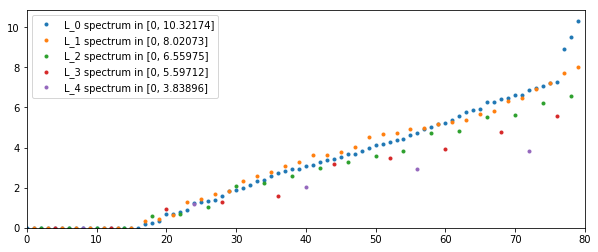

In [5]:
slic = slic_fixed(num_segments=100, compactness=5, max_iterations=10, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(mnist, slic)

## MNIST Quickshift

Level 0: 96 nodes, 179 edges
Level 1: 48 nodes, 108 edges
Level 2: 24 nodes, 50 edges
Level 3: 12 nodes, 23 edges
Level 4: 6 nodes, 8 edges


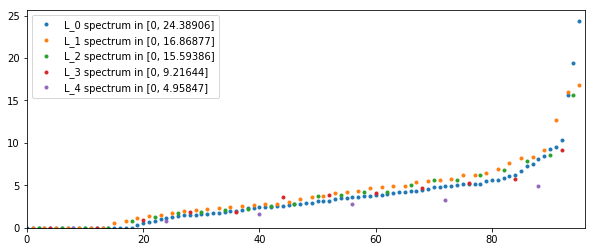

In [6]:
quickshift = quickshift_fixed(ratio=1, kernel_size=2, max_dist=2, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(mnist, quickshift)

## Cifar10 SLIC

Level 0: 160 nodes, 289 edges
Level 1: 80 nodes, 157 edges
Level 2: 40 nodes, 80 edges
Level 3: 20 nodes, 39 edges
Level 4: 10 nodes, 19 edges


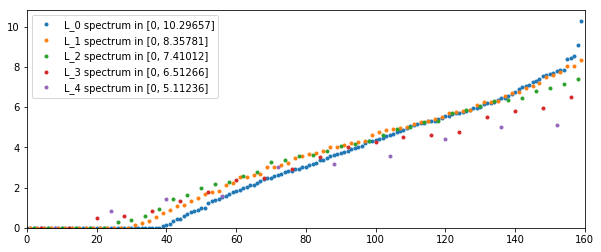

In [7]:
slic = slic_fixed(num_segments=150, compactness=5, max_iterations=10, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(cifar_10, slic)

## Cifar10 Quickshift

Level 0: 208 nodes, 438 edges
Level 1: 104 nodes, 256 edges
Level 2: 52 nodes, 130 edges
Level 3: 26 nodes, 69 edges
Level 4: 13 nodes, 32 edges


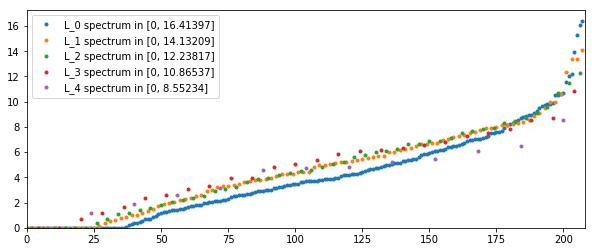

In [8]:
quickshift = quickshift_fixed(ratio=1, kernel_size=1, max_dist=5, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(cifar_10, quickshift)

## PascalVOC SLIC

Level 0: 960 nodes, 1896 edges
Level 1: 480 nodes, 1083 edges
Level 2: 240 nodes, 574 edges
Level 3: 120 nodes, 297 edges
Level 4: 60 nodes, 148 edges


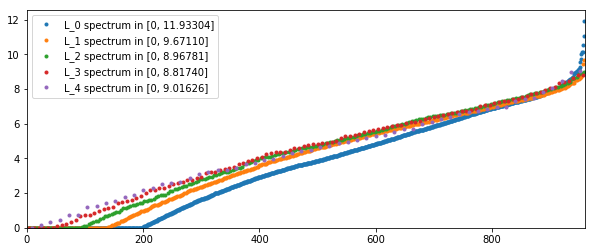

In [9]:
slic = slic_fixed(num_segments=800, compactness=30, max_iterations=10, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(pascal_voc, slic)

## PascalVOC Quickshift

Level 0: 592 nodes, 1776 edges
Level 1: 296 nodes, 984 edges
Level 2: 148 nodes, 487 edges
Level 3: 74 nodes, 238 edges
Level 4: 37 nodes, 112 edges


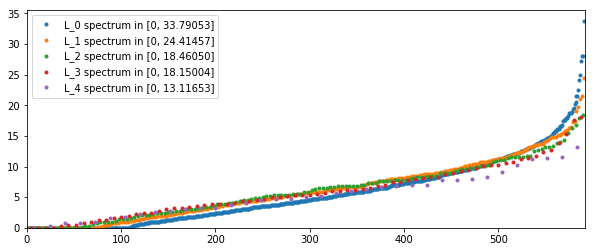

In [10]:
quickshift = quickshift_fixed(ratio=1, kernel_size=3, max_dist=15, sigma=0)
plt.rcParams['figure.figsize'] = (10, 4)
plot_laplacians(pascal_voc, quickshift)